## <span style="color:blue">What is Feature Reduction ? </span>


 
- <span style="color:darkgreen"> Machine Learning models especially the "Classical Statistical" models such as Linear and Logistic Regression do not perform well if we have multiple independent features in the dataset that provide similar information. This gives rise to a concept known as multicollinearity which leads to one of the biggest issues when dealing with data modeling– Overfitting. </span>


- <span style="color:darkgreen"> Multicollinearity is caused when we have multiple correlated features. There are various ways of finding such variables and getting rid of them. </span>
 
<br> 
 
 
 ## <span style="color:blue">What is Feature Selection ? </span>
 
 
- <span style="color:darkgreen"> Among the various ways of Reducing Features is Feature Selection where we explicitly select the features we want to use in our model. </span>
 
 
- <span style="color:darkgreen"> Similarly, rather than selecting the features, we can also concentrate on the features we don't want to keep and methods that do so will also be considered as Feature Selection methods. </span>
 
 <br> 
 
 
## <span style="color:blue"> What is Embedded Methods ? </span>

- <span style="color:darkgreen"> Embedded Methods are a range of Feature Selection methods where we drop variables based on there coefficient values. </span>


- <span style="color:darkgreen"> Embedded Methods use a concept called regularization where the coefficients are forced to be spread out more equally among all the features. When we have a lot of features, then the coefficients tend to inflate even of those features which are not useful or are correlated with other features. Regularization methods force such coefficients to shrink. </span>


<br> 
 
## <span style="color:blue"> What is Ridge, Lasso and Elastic Net ? </span>

- <span style="color:darkgreen"> Ridge, Lasso and Elastic are the various methods through which we can create Regression Models that perfrom different kinds of Regularization </span>


- <span style="color:darkgreen"> Each of these methods uses different kinds of "regularization norms" which based on there mathematical methodology have different effects on the coefficients of the features. </span>
     - <span style="color:darkgreen"> **Ridge** </span>: <span style="color:seagreen"> Ridge uses a **L2 norm** where the coefficients are penalized for being too large than what they should be if multicollinearity wasn't there. L2 norm shrinks the coefficients but never makes them 0. </span>
      
     - <span style="color:darkgreen"> **Lasso** </span>: <span style="color:seagreen"> Lasso uses a **L1 norm** where the coefficients can penalized to such an extent that coefficients can become 0 </span>
      
     - <span style="color:darkgreen"> **Elastic Net** </span>: <span style="color:seagreen"> It performs a combination of  **L1 & L2 norm**.</span>
     

<br>


## <span style="color:blue"> What is alpha ? </span>

- <span style="color:darkgreen"> Alpha is the strength of the penalty imposed on the coefficients </span>
- <span style="color:darkgreen"> If we use L2 norm the penalty is equal to the square of the magnitude of coefficients</span>
- <span style="color:darkgreen"> In L1 norm, the penalty is equal to the absolute value of the magnitude of coefficients</span>
- <span style="color:darkgreen"> We control this by using the argument "alpha = N" in Python. </span>
- <span style="color:darkgreen"> Note: The formula for all these methods is such that if alpha is set at 0, it will become Ridge and if alpha is equal to 1 then it becomes Lasso. Therefore, for e.g. If we use Ridge with alpha=0 and Elastic with alpha=0, the output of both of them will be same as the Lasso will behave like Ridge only.</span>



<br> 
 
## <span style="color:blue"> How to use Regularization ? </span>

- <span style="color:darkgreen"> **Feature Reduction** : Regularization can be used during Regularized Regression where coefficients are generated. We can use Regularized Regression for finding the coefficients that are very less is  value (Ridge/Elastic) or have no value (Lasso) and drop such features thus performing Feature Reduction. These remaining features then can be used for creating a Machine Learning Model </span>


- <span style="color:darkgreen"> **Predictive Modeling** : We can also directly use Regularized Regression for predictive modeling where use we perform no feature deduction (or do perfrom using other methods) and input the features in the Regularized Regression model and get the predictions. In this method we take little to no stress regarding feature reduction as the problem of multicolinearity is taken care of by the regulatory norms.</span>

# Data Preparation

We will import and prepare a dataset and will use it for:
<br>
( i )  Feature Reduction using Regularization Methods
<br>
( ii )  Perform Predictive Modeling using Regularized Regression

### Importing Basic Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split 
from sklearn import metrics

### Importing Data

We use the "Boston" dataset that can be accessed using the sklearn package.

In [2]:
from sklearn.datasets import load_boston

In [3]:
BostonData = load_boston()

In [4]:
# The data Boston is provided under different keys.

print(BostonData.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [5]:
# The feature names in the Boston Dataset

print(BostonData.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
# Description of the Boston Dataset

print(BostonData.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
# Saving the Boston dataset's data as Pandas DataFrame from the data key (that has all the independent variables)

BosData = pd.DataFrame(BostonData.data)
BosData.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
# Adding the feature names by using the feature_names key

BosData.columns = BostonData.feature_names
BosData.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
# Adding the dependent (Y) variable available in the target key

BosData['Price']=BostonData.target
BosData.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Performing Basic Checks

We look for the missing values in the dataset and the distribution of the Y variable

In [10]:
# No missing values in the dataset

BosData.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

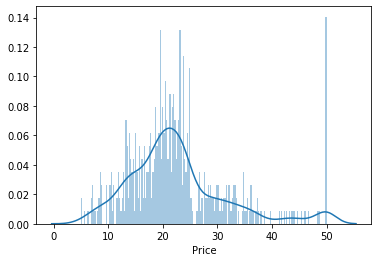

In [11]:
# Distribution of the Y variable seems close to normal

sns.distplot(BosData.Price,bins=200)

In [12]:
# Measuring the skewness in the Y variable's distribution

BosData['Price'].skew()

1.1080984082549072

In [13]:
# Measuring the kurtosis in the Y variable's distribution

BosData['Price'].kurtosis()

1.495196944165818

In [14]:
# Performing Log Transformation to check if it makes the distribution more normal 
BosData['ln_Price'] = np.log(BosData['Price'])

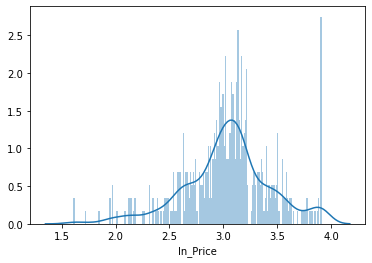

In [15]:
# Distribution of the log Y variable also seems close to normal

sns.distplot(BosData.ln_Price,bins=200)

In [16]:
# Measuring the skewness in the log Y variable's distribution
# The skewness in the log Y is less than Y (closer to 0) therefore we will proceed with log Y

BosData['ln_Price'].skew()

-0.33032129530987864

In [17]:
BosData.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price', 'ln_Price'],
      dtype='object')

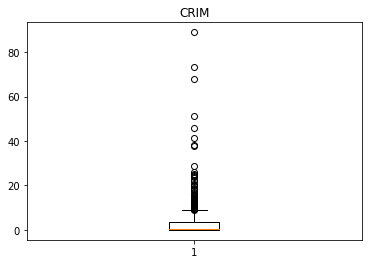

<Figure size 144x72 with 0 Axes>

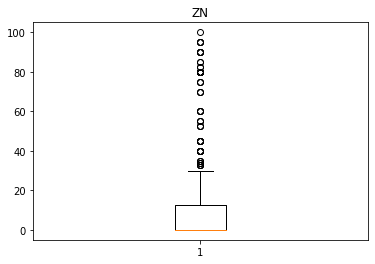

<Figure size 144x72 with 0 Axes>

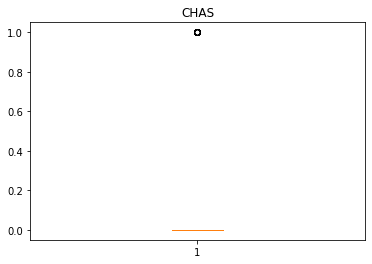

<Figure size 144x72 with 0 Axes>

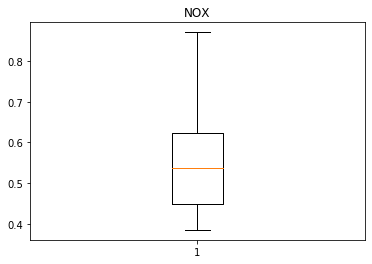

<Figure size 144x72 with 0 Axes>

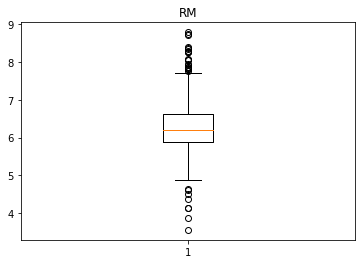

<Figure size 144x72 with 0 Axes>

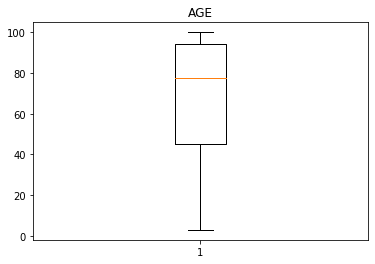

<Figure size 144x72 with 0 Axes>

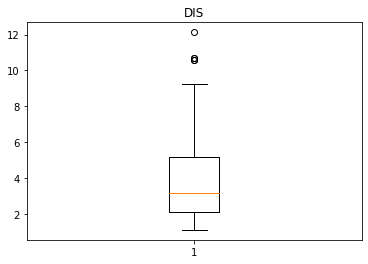

<Figure size 144x72 with 0 Axes>

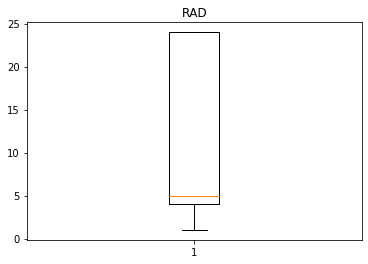

<Figure size 144x72 with 0 Axes>

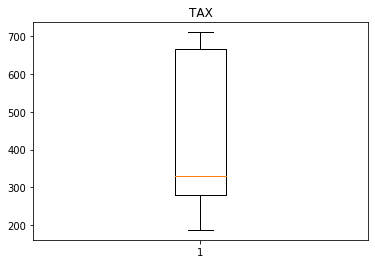

<Figure size 144x72 with 0 Axes>

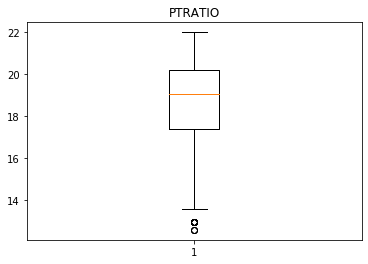

<Figure size 144x72 with 0 Axes>

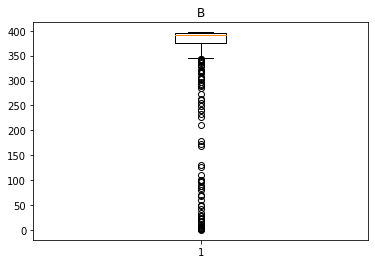

<Figure size 144x72 with 0 Axes>

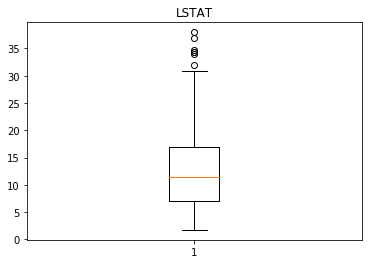

<Figure size 144x72 with 0 Axes>

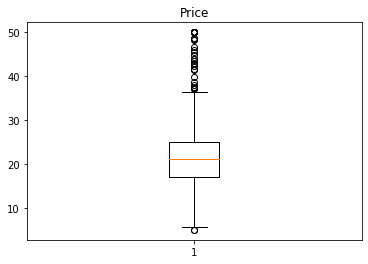

<Figure size 144x72 with 0 Axes>

In [18]:
# Checking for outliers using Boxplots 
# No Outliers were detected in any of the features

plt.boxplot(BosData.CRIM)
plt.title("CRIM")
plt.figure(figsize=(2,1))
plt.show()

plt.boxplot(BosData.ZN)
plt.title("ZN")
plt.figure(figsize=(2,1))
plt.show()

plt.boxplot(BosData.CHAS)
plt.title("CHAS")
plt.figure(figsize=(2,1))
plt.show()

plt.boxplot(BosData.NOX)
plt.title("NOX")
plt.figure(figsize=(2,1))
plt.show()

plt.boxplot(BosData.RM)
plt.title("RM")
plt.figure(figsize=(2,1))
plt.show()

plt.boxplot(BosData.AGE)
plt.title("AGE")
plt.figure(figsize=(2,1))
plt.show()

plt.boxplot(BosData.DIS)
plt.title("DIS")
plt.figure(figsize=(2,1))
plt.show()

plt.boxplot(BosData.RAD)
plt.title("RAD")
plt.figure(figsize=(2,1))
plt.show()

plt.boxplot(BosData.TAX)
plt.title("TAX")
plt.figure(figsize=(2,1))
plt.show()

plt.boxplot(BosData.PTRATIO)
plt.title("PTRATIO")
plt.figure(figsize=(2,1))
plt.show()

plt.boxplot(BosData.B)
plt.title("B")
plt.figure(figsize=(2,1))
plt.show()

plt.boxplot(BosData.LSTAT)
plt.title("LSTAT")
plt.figure(figsize=(2,1))
plt.show()

plt.boxplot(BosData.Price)
plt.title("Price")
plt.figure(figsize=(2,1))
plt.show()

In [19]:
# Creating Train and Test Dataset
X = BosData[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT']]
Y = BosData['ln_Price']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=123)

# Using Regularization for performing Feature Reduction

In [20]:
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

### Using Linear Regression to come up with the Coefficients

In [21]:
# Initializing Model

linreg_model = linear_model.LinearRegression()

#dir(linreg_model)
#linear_model.LinearRegression?

In [22]:
# Fitting Model

ln_model=linreg_model.fit(X_train,Y_train)

y_train_pred=ln_model.predict(X_train)
y_pred=ln_model.predict(X_test)
print(metrics.r2_score(Y_test,y_pred))

print(metrics.mean_absolute_error(Y_train,y_train_pred))
print(metrics.mean_absolute_error(Y_test,y_pred))

0.7184549221719685
0.12567961518799237
0.15228894578869476


In [23]:
Non_Reg_coef = pd.DataFrame(linreg_model.coef_,X_train.columns,columns=['Non_Reg_Coefficient'])
Non_Reg_coef

,Non_Reg_Coefficient
CRIM,-0.010277
ZN,0.000792
INDUS,0.004594
CHAS,0.035459
NOX,-0.672618
RM,0.130099
AGE,0.000030
DIS,-0.042281
RAD,0.014007
TAX,-0.000698


### Using Ridge for performing Feature Reduction

In [24]:
# Initializing Model

tuned_parameters = [{'alpha': [0.001,0.01,0.1,1.,10.,100.]}]

RidgeCV = GridSearchCV(linear_model.Ridge(),
                   tuned_parameters,
                   cv=5,
                   n_jobs=-1,
                   scoring='neg_mean_squared_error',
                   verbose=2)

RidgeCV.fit(X_train,Y_train)

print('Best combination:', RidgeCV.best_params_);

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Best combination: {'alpha': 0.1}


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    7.7s finished


In [25]:
# Fitting Model

#Ridge=RidgeCV.best_params_
Ridge=linear_model.Ridge(alpha=0.1)


Ridge_model=Ridge.fit(X_train,Y_train)

y_pred=Ridge_model.predict(X_test)
#metrics.r2_score(Y_train,y_pred)

metrics.mean_absolute_error(Y_test,y_pred)

0.1524282717285534

In [26]:
# Finding the Coefficients

Ridge_coef = pd.DataFrame(Ridge.coef_,X_train.columns,columns=['Ridge_Coefficient'])
Ridge_coef

,Ridge_Coefficient
CRIM,-0.010247
ZN,0.000794
INDUS,0.004366
CHAS,0.034306
NOX,-0.611219
RM,0.130790
AGE,-0.000024
DIS,-0.041346
RAD,0.013813
TAX,-0.000702


### Using Lasso for performing Feature Reduction

In [27]:
# Initializing Model

tuned_parameters = [{'alpha': [0,0.0001,0.001,0.01,0.1,1.,10.]}]

LassoCV = GridSearchCV(linear_model.Lasso(),
                   tuned_parameters,
                   cv=10,
                   n_jobs=-1,
                   scoring='neg_mean_squared_error')

LassoCV.fit(X_train,Y_train)

print('Best combination:', LassoCV.best_params_);

Best combination: {'alpha': 0.0001}


In [28]:
# Fitting Model
Lasso = linear_model.Lasso(alpha=0.0001)
Lasso.fit(X_train,Y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [29]:
# Finding the Coefficients

lasso_coef = pd.DataFrame(Lasso.coef_,X_train.columns,columns=['Lasso_Coefficient'])
lasso_coef

,Lasso_Coefficient
CRIM,-0.010258
ZN,0.000793
INDUS,0.004457
CHAS,0.033063
NOX,-0.635790
RM,0.130295
AGE,0.000002
DIS,-0.041686
RAD,0.013898
TAX,-0.000701


### Using Elastic Net for performing Feature Reduction

In [30]:
# Initializing Model

tuned_parameters = [{'alpha': [0.0001,0.001,0.01,0.1,1.,10.,100.]}]

ElasticNet_CV = GridSearchCV(linear_model.ElasticNet(),
                   tuned_parameters,
                   cv=10,
                   n_jobs=-1,
                   scoring='neg_mean_squared_error')

ElasticNet_CV.fit(X_train,Y_train)

print('Best combination:', ElasticNet_CV.best_params_);

Best combination: {'alpha': 0.0001}


C:\Users\RAHUL CHHIKARA\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [31]:
# Fitting Model
EN = linear_model.ElasticNet(alpha=0.1)
EN_model=EN.fit(X_train,Y_train)


y_pred=EN_model.predict(X_test)
#metrics.r2_score(Y_train,y_pred)

metrics.mean_absolute_error(Y_test,y_pred)

#X_train,X_test,Y_train,Y_test
#metrics.mean_squared_error(train.actual_sales , train.pred_sales)

0.1681632012582988

In [32]:
linear_model.ElasticNet?

In [33]:
# Finding the Coefficients

elastic_coef = pd.DataFrame(EN.coef_,X_train.columns,columns=['Elastic_Net_Coefficient'])
elastic_coef

,Elastic_Net_Coefficient
CRIM,-0.007997
ZN,0.000524
INDUS,0.000000
CHAS,0.000000
NOX,-0.000000
RM,0.000000
AGE,0.001162
DIS,-0.009007
RAD,0.009255
TAX,-0.000664


### Comparing Coefficients

In [34]:
pd.concat([Non_Reg_coef,Ridge_coef,lasso_coef,elastic_coef],axis=1)

,Non_Reg_Coefficient,Ridge_Coefficient,Lasso_Coefficient,Elastic_Net_Coefficient
CRIM,-0.010277,-0.010247,-0.010258,-0.007997
ZN,0.000792,0.000794,0.000793,0.000524
INDUS,0.004594,0.004366,0.004457,0.000000
CHAS,0.035459,0.034306,0.033063,0.000000
NOX,-0.672618,-0.611219,-0.635790,-0.000000
RM,0.130099,0.130790,0.130295,0.000000
AGE,0.000030,-0.000024,0.000002,0.001162
DIS,-0.042281,-0.041346,-0.041686,-0.009007
RAD,0.014007,0.013813,0.013898,0.009255
TAX,-0.000698,-0.000702,-0.000701,-0.000664


<span style="color:brown"> <i> We can see that if we consider Lasso also known as the only true Feature Reduction method (using Regularization) as for other methods we require some arbitrarily decided threshold to reduce features (where if the feature's coefficient value is less than the predecided threshold value, the feature is dropped), we find 5 variables to be less useful and causing Multicollinearity. </i> </span>

These 5 variables are as follows:<br>
<span style="color:red">
(1) INDUS
<br>
(2) CHAS
<br>
(3) NOX
<br>
(4) RM
<br>
(5) DIS
</span>

<span style="color:brown"> <i> This way we are able to reduce the number of features from 13 to 8.</i> </span>


Therefore the features that can be selected for creating predictive models are:
<span style="color:green"><br>
(1) CRIM<br>
(2) ZN<br>
(3) AGE<br>
(4) RAD<br>
(5) TAX<br>
(6) PTRATIO<br>
(7) B<br>
(8) LSTAT
</span>

## Comparing Feature Reduction Technique
Comparing feature reduction performed by Regularization (in this case Lasso) with other Feature Reduction Technque such as Recursive Feature Elimination (RFE)

### Features Selcted by Lasso v/s RFE

In [35]:
# Importing Module for performing RFE

from sklearn.feature_selection import RFE

In [36]:
#  Initializing RFE model with using 8 as input to have the 8 most important features in the output.

rfe = RFE(linreg_model, 8)

In [37]:
# Fitting RFE Model

rfe = rfe.fit(X_train, Y_train)

In [38]:
# Printing the 8 selected Features

print('Selected features: %s' % list(X_train.columns[rfe.support_]))

Selected features: ['CRIM', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'PTRATIO', 'LSTAT']


### Finding which set of features give better accuracy (using Decision Trees)

In [39]:
from sklearn.tree import DecisionTreeRegressor

#### Accuracy using Lasso dataset

In [40]:
# Creating Train and Test Dataset for Lasso

X_L = BosData[['CRIM','ZN','AGE','RAD','TAX','PTRATIO','B','LSTAT']]
Y = BosData['ln_Price']
X_L_train,X_L_test,Y_L_train,Y_L_test=train_test_split(X,Y,test_size=0.3,random_state=123)

In [41]:
# Initalizing and Fitting Decesion Tree Model on Lasso Selected features

DTR = DecisionTreeRegressor()
DTR.fit(X_L_train,Y_L_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [42]:
# Finding Accuracy on Test dataset

Pred_DTR_L = DTR.predict(X_L_test)
Lasso_Accuracy = metrics.r2_score(Y_L_test,Pred_DTR_L)
Lasso_Accuracy

0.655333575460495

#### Accuracy using RFE dataset

In [43]:
# Creating Train and Test Dataset for Lasso

X_RFE = BosData[['CRIM', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'PTRATIO', 'LSTAT']]
Y = BosData['ln_Price']
X_RFE_train,X_RFE_test,Y_RFE_train,Y_RFE_test=train_test_split(X,Y,test_size=0.3,random_state=123)

In [44]:
# Initalizing and Fitting Decesion Tree Model on Lasso Selected features

DTR = DecisionTreeRegressor()
DTR.fit(X_RFE_train,Y_RFE_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [45]:
# Finding Accuracy on Test dataset

Pred_DTR_RFE = DTR.predict(X_RFE_test)
RFE_Accuracy = metrics.r2_score(Y_RFE_test,Pred_DTR_RFE)
RFE_Accuracy

0.6592898550737505

## Analysis

<span style="color:brown"> <i>The features that were selected using Regularization (Lasso) were : </span>
<span style="color:green"><br>
(1) CRIM<br>
(2) ZN<br>
(3) AGE<br>
(4) RAD<br>
(5) TAX<br>
(6) PTRATIO<br>
(7) B<br>
(8) LSTAT
</span>

<span style="color:brown"> <i> Whereas, the features selected using RFE came out to be : </i> </span>
<span style="color:blue"><br>
(1) **CRIM** <br>
(2) CHAS <br>
(3) NOX  <br>
(4) RM   <br>
(5) DIS <br> 
(6) **RAD** <br>
(7) **PTRATIO** <br>
(8) **LSTAT**  <br>
**(Common with Lasso)**
</span>


<span style="color:brown"> <i> The accuracy achieved from using the independent variables gained from Lasso and RFE came out to be almost same (RFE came slightly higher, while Lasso's performance can be increased by tuning the alpha value). Therefore, it is safe to say that Regularization techniques can be used as Feature Reduction method. </i> </span>

# Using Regularization for Model Building

We can bypass/avoid the feature reduction step when creating a predictive model using Regression. This can be achieved by performing regularization during model building only.

## Linear Regression (without Regularization)

In [46]:
# Initializing Model
linreg_model = linear_model.LinearRegression()

# Fitting Model
linreg_model.fit(X_train,Y_train)

# Predicting Values
pred_linmodel = linreg_model.predict(X_test)

# Checking Accuracy (on Test dataset)
acc_noreg = round(metrics.r2_score(Y_test,pred_linmodel),3)

# Finding Coefficients
Non_Reg_coef = pd.DataFrame(linreg_model.coef_,X_train.columns,columns=['Non_Reg_Coefficient'])

# Reseting Index
Non_Reg_coef = Non_Reg_coef.reset_index()

# Renaming the columns
Non_Reg_coef.columns = ['Features','Coefficient']

# Selecting the features and coeff that have been considered for the model
Selected_Features = Non_Reg_coef[Non_Reg_coef['Coefficient']!=0]

# Extracting the features name that have been selected for model building
Selected_Features_names=Selected_Features.Features.unique()

# Finding the number of features name that have been selected for model building
Number_of_Selected_Features = len(Selected_Features)


print('Accuracy achieved using Linear Regression (Non-Regularized is:',acc_noreg,"while the number of features used are",Number_of_Selected_Features,"with the selected features being",Selected_Features_names)

Accuracy achieved using Linear Regression (Non-Regularized is: 0.718 while the number of features used are 13 with the selected features being ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


## Linear Regression (Regularization : Ridge)

In [47]:
# Initializing Model
Ridge = linear_model.Ridge(alpha=0.1)

# Fitting Model
Ridge.fit(X_train,Y_train)

# Predicting Values
pred_linmodel_ridge = Ridge.predict(X_test)

# Checking Accuracy (on Test dataset)
acc_ridge = round(metrics.r2_score(Y_test,pred_linmodel_ridge),3)

# Finding Coefficients
Ridge_coef = pd.DataFrame(Ridge.coef_,X_train.columns,columns=['Ridge_Coefficient'])

# Reseting Index
Ridge_coef = Ridge_coef.reset_index()

# Renaming the columns
Ridge_coef.columns = ['Features','Coefficient']

# Selecting the features and coeff that have been considered for the model
Selected_Features_Ridge = Ridge_coef[Ridge_coef['Coefficient']!=0]

# Extracting the features name that have been selected for model building
Selected_Features_names_Ridge=Selected_Features_Ridge.Features.unique()

# Finding the number of features name that have been selected for model building
Number_of_Selected_Features_Ridge = len(Selected_Features_Ridge)


print('Accuracy achieved using Linear Regression (Regularization : Ridge) is:',acc_ridge,"while the number of features used are",Number_of_Selected_Features_Ridge,"with the selected features being",Selected_Features_names_Ridge)

Accuracy achieved using Linear Regression (Regularization : Ridge) is: 0.717 while the number of features used are 13 with the selected features being ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


## Linear Regression (Regularization : Lasso)

In [48]:
# Initializing Model
Lasso = linear_model.Lasso(alpha=0.07)

# Fitting Model
Lasso.fit(X_train,Y_train)

# Predicting Values
pred_linmodel_lasso = Lasso.predict(X_test)

# Checking Accuracy (on Test dataset)
acc_lasso = round(metrics.r2_score(Y_test,pred_linmodel_lasso),3)

# Finding Coefficients
Lasso_coef = pd.DataFrame(Lasso.coef_,X_train.columns,columns=['Lasso_Coefficient'])

# Reseting Index
Lasso_coef = Lasso_coef.reset_index()

# Renaming the columns
Lasso_coef.columns = ['Features','Coefficient']

# Selecting the features and coeff that have been considered for the model
Selected_Features_Lasso = Lasso_coef[Lasso_coef['Coefficient']!=0]

# Extracting the features name that have been selected for model building
Selected_Features_names_Lasso=Selected_Features_Lasso.Features.unique()

# Finding the number of features name that have been selected for model building
Number_of_Selected_Features_Lasso = len(Selected_Features_Lasso)


print('Accuracy achieved using Linear Regression (Regularization : Lasso) is:',acc_lasso,"while the number of features used are",Number_of_Selected_Features_Lasso,"with the selected features being",Selected_Features_names_Lasso)

Accuracy achieved using Linear Regression (Regularization : Lasso) is: 0.685 while the number of features used are 8 with the selected features being ['CRIM' 'ZN' 'AGE' 'RAD' 'TAX' 'PTRATIO' 'B' 'LSTAT']


## Linear Regression (Regularization : Elastic Net)

In [49]:
# Initializing Model
Elastic = linear_model.ElasticNet(alpha=0.1)

# Fitting Model
Elastic.fit(X_train,Y_train)

# Predicting Values
pred_linmodel_Elastic = Elastic.predict(X_test)

# Checking Accuracy (on Test dataset)
acc_Elastic = round(metrics.r2_score(Y_test,pred_linmodel_Elastic),3)

# Finding Coefficients
Elastic_coef = pd.DataFrame(Elastic.coef_,X_train.columns,columns=['Elastic_Coefficient'])

# Reseting Index
Elastic_coef = Elastic_coef.reset_index()

# Renaming the columns
Elastic_coef.columns = ['Features','Coefficient']

# Selecting the features and coeff that have been considered for the model
Selected_Features_Elastic = Elastic_coef[Elastic_coef['Coefficient']!=0]

# Extracting the features name that have been selected for model building
Selected_Features_names_Elastic=Selected_Features_Elastic.Features.unique()

# Finding the number of features name that have been selected for model building
Number_of_Selected_Features_Elastic = len(Selected_Features_Elastic)


print('Accuracy achieved using Linear Regression (Regularization : Elastic) is:',acc_Elastic,"while the number of features used are",Number_of_Selected_Features_Elastic,"with the selected features being",Selected_Features_names_Elastic)

Accuracy achieved using Linear Regression (Regularization : Elastic) is: 0.697 while the number of features used are 9 with the selected features being ['CRIM' 'ZN' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO' 'B' 'LSTAT']


## Analysis

- <span style="color:brown"> <i> 71.9% Accuracy was achieved when all of the data was used for building a Linear Regression model that doesn't do any regularization. However, this can cause problems when dealing with Unseen data as the model may be overfitting due to multicollinearity. </i> </span>


- <span style="color:brown"> <i> 71.8% Accuracy when all the independent features were used for building a Linear Regression model that does Regularization using Ridge (L2 norm). Again, the problem of multicolliniearity persists as it uses all of the 13 variables to come up with predition and achieve 71% of accuracy. </i> </span>


- <span style="color:brown"> <i> 68.6% Accuracy was achieved when a Linear Regression model was built using all of the data. Here Lasso was used in order to penalize the coefficients which resulted in 5 variable's coefficients being dragged to 0 causing feature reduction. Only 8 features were used out of 13. Thus, at the cost of almost 3% of accuracy, we were able to get rid of almost 40% of the variables.</i> </span>


- <span style="color:brown"> <i> Almost 70% Accuracy was achieved when Elastic Net was used as the regularization method. Only 9 features were used to attain this level of accuracy while the remaining feature's coefficients were lowered down to 0. Here, at the cost of merely 2% of accuracy, we were able to get rid of almost 30% of all the independent the variables.</i> </span>


- <span style="color:brown"> <i> The performance of Lasso and Elastic Net can be increased by fine-tuning the alpha value (preferably by using Grid Search) whereas, for Ridge, appropriate threshold value can be chosen in order to perform feature reduction, however, in order to completely avoid feature reduction, Lasso and Elastic Net should be preferred as they make the coefficients value 0 thus directly performing feature reducing during model building. </i> </span>